# Modifying Models

Given a model that is already built and possibly optimized, the user might want to modify single constraint or variable bounds by means of correction or exploration of the feasible space. 

In the following we show how single elements can be tweaked or rewritten. Let's start with the simple model of the `Getting Started` section. 

In [1]:
import linopy 
import pandas as pd
import xarray as xr

Set parameter TokenServer to value "ensys3.service.tu-berlin.de"
Read LP format model from file /tmp/linopy-problem-p6hjkldv.lp
Reading time = 0.00 seconds
obj: 20 rows, 20 columns, 40 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: AMD Ryzen 7 PRO 5850U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 20 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x89bb3e20
Coefficient statistics:
  Matrix range     [2e+00, 7e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 9e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 18 rows, 18 columns, 36 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.312500e+01   0.000000e+00      0s
      18    1.2879310e+02   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.00 se

<AxesSubplot:xlabel='time', ylabel='Optimal Value'>

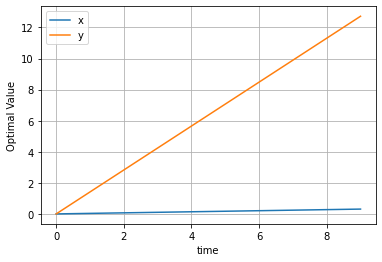

In [2]:
m = linopy.Model()
time = pd.Index(range(10), name='time')

x = m.add_variables(lower=0, coords=[time], name='x', )
y = m.add_variables(lower=0, coords=[time], name='y')

factor = pd.Series(time, index=time)

con1 = m.add_constraints(3*x + 7*y >= 10*factor, name='con1')
con2 = m.add_constraints(5*x + 2*y >= 3*factor, name='con2')

m.add_objective(x + 2*y) 
m.solve()

m.solution.to_dataframe().plot(grid=True, ylabel='Optimal Value')

The figure above shows the optimal values of `x(t)` and `y(t)`. 

## Varying lower and upper bounds

Now, let's say we want to set the lower bound of `y(t)` to 1. This would translate to:

In [3]:
x.lower = 1 

**Note:**
The same could have been achieved by calling 
```python 
m.variables['x'].lower = 1
```

Let's solve it again!

Read LP format model from file /tmp/linopy-problem-2qq1aodd.lp
Reading time = 0.00 seconds
obj: 20 rows, 20 columns, 40 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: AMD Ryzen 7 PRO 5850U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 20 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xd3985941
Coefficient statistics:
  Matrix range     [2e+00, 7e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 9e+01]
Presolve removed 4 rows and 4 columns
Presolve time: 0.00s
Presolved: 16 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3085714e+02   0.000000e+00   0.000000e+00      0s
       0    1.3085714e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.308571429e+02


<AxesSubplot:xlabel='time', ylabel='Optimal Value'>

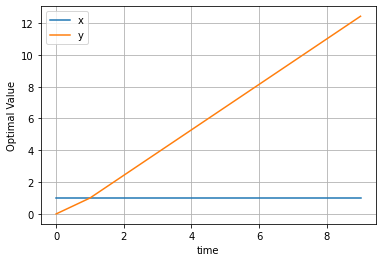

In [4]:
m.solve();
m.solution.to_dataframe().plot(grid=True, ylabel='Optimal Value')

We see that the new lower bound of x is binding across all time steps.

Of course the implementation is flexible over the dimensions, so we can pass non-scalar values:

In [5]:
x.lower = xr.DataArray(range(10, 0, -1), coords=(time,))

Read LP format model from file /tmp/linopy-problem-9ldctusl.lp
Reading time = 0.00 seconds
obj: 20 rows, 20 columns, 40 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: AMD Ryzen 7 PRO 5850U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 20 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x3cc0a80d
Coefficient statistics:
  Matrix range     [2e+00, 7e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [3e+00, 9e+01]
Presolve removed 14 rows and 14 columns
Presolve time: 0.00s
Presolved: 6 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5100000e+02   0.000000e+00   0.000000e+00      0s
       0    1.5100000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.510000000e+02


<AxesSubplot:xlabel='time', ylabel='Optimal Value'>

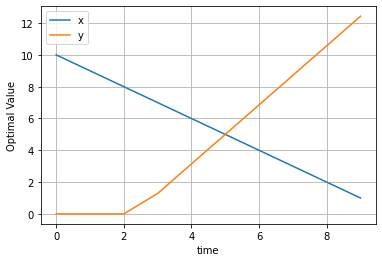

In [6]:
m.solve();
m.solution.to_dataframe().plot(grid=True, ylabel='Optimal Value')

You can manipulate the upper bound of a variable in the same way.

## Varying Constraints

A similar functionality is implemented for constraints. Here we can modify the left-hand-side, the sign and the right-hand-side.

Assume we want to relax the right-hand-side of the first constraint `con1` to `8 * factor`. This would translate to:

In [7]:
con1.rhs = 8 * factor

**Note:**
The same could have been achieved by calling 
```python 
m.variables['con1'].rhs = 8 * factor
```

Let's solve it again!

Read LP format model from file /tmp/linopy-problem-x30gqxnl.lp
Reading time = 0.00 seconds
obj: 20 rows, 20 columns, 40 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: AMD Ryzen 7 PRO 5850U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 20 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x60818c1c
Coefficient statistics:
  Matrix range     [2e+00, 7e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [3e+00, 7e+01]
Presolve removed 14 rows and 14 columns
Presolve time: 0.00s
Presolved: 6 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2700000e+02   2.857143e-01   0.000000e+00      0s
       1    1.2707882e+02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.270788177e+02


<AxesSubplot:xlabel='time', ylabel='Optimal Value'>

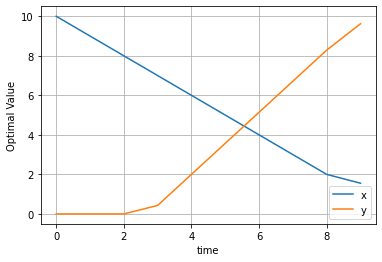

In [8]:
m.solve();
m.solution.to_dataframe().plot(grid=True, ylabel='Optimal Value')

In contrast to previous figure, we now see that the optimal value of `y` does not reach values above 10 in the end. 

In the same way, we can modify the left-hand-side. Assume we want to weight `y` with a coefficient of 8 in the constraints, this gives

In [9]:
con1.lhs = 3 * x + 8 * y

**Note:**
The same could have been achieved by calling 
```python 
m.constraints['con1'].lhs = 3 * x + 8 * y
```

which leads to

Read LP format model from file /tmp/linopy-problem-hbdr0x3a.lp
Reading time = 0.00 seconds
obj: 20 rows, 20 columns, 40 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: AMD Ryzen 7 PRO 5850U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 20 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x0670e3d9
Coefficient statistics:
  Matrix range     [2e+00, 8e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [3e+00, 7e+01]
Presolve removed 12 rows and 12 columns
Presolve time: 0.00s
Presolved: 8 rows, 8 columns, 16 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.6400000e+01   0.000000e+00   0.000000e+00      0s
       0    9.6400000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.640000000e+01


<AxesSubplot:xlabel='time', ylabel='Optimal Value'>

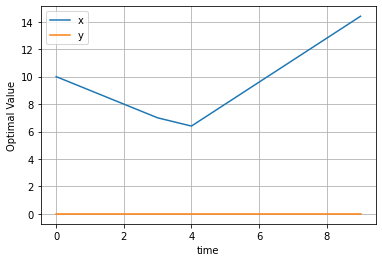

In [10]:
m.solve();
m.solution.to_dataframe().plot(grid=True, ylabel='Optimal Value')

## Varying the objective 

Varying the objective happens in the same way as for the left-hand-side of the constraint as it is a linear expression too. Note, when passing an unstacked linear expression, i.e. an expression with more than the `_term` dimension, `linopy` will automatically stack it. 

So assume, we would like to modify the weight of `y` in the objective function, this translates to:

In [12]:
m.objective = x + 3*y

Read LP format model from file /tmp/linopy-problem-e8pp3l_w.lp
Reading time = 0.00 seconds
obj: 20 rows, 20 columns, 40 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: AMD Ryzen 7 PRO 5850U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 20 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xbeb814a9
Coefficient statistics:
  Matrix range     [2e+00, 8e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [3e+00, 7e+01]
Presolve removed 12 rows and 12 columns
Presolve time: 0.00s
Presolved: 8 rows, 8 columns, 16 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.6400000e+01   0.000000e+00   0.000000e+00      0s
       0    9.6400000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.640000000e+01


<AxesSubplot:xlabel='time', ylabel='Optimal Value'>

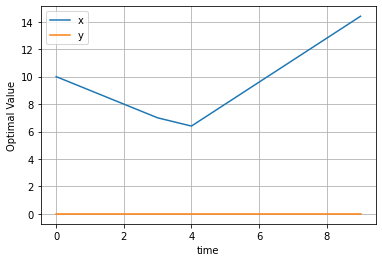

In [13]:
m.solve();
m.solution.to_dataframe().plot(grid=True, ylabel='Optimal Value')

As a consequence, `y` stays at zero for all time steps.